# Parsed corpus

In [1]:
import nltk
from nltk.corpus import treebank

print(treebank.parsed_sents('wsj_0007.mrg')[2])
#tree.draw()

(S
  (NP-SBJ
    (NP (NNP Bailey) (NNP Controls))
    (, ,)
    (VP
      (VBN based)
      (NP (-NONE- *))
      (PP-LOC-CLR
        (IN in)
        (NP (NP (NNP Wickliffe)) (, ,) (NP (NNP Ohio)))))
    (, ,))
  (VP
    (VBZ makes)
    (NP
      (JJ computerized)
      (JJ industrial)
      (NNS controls)
      (NNS systems)))
  (. .))


In [3]:
nltk.corpus.treebank.parsed_sents('wsj_0007.mrg')[2].draw()

# Spacy modules

In [2]:
!pip install spacy
!python -m spacy download en_core_web_sm

  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.36.1
    Uninstalling tqdm-4.36.1:
      Successfully uninstalled tqdm-4.36.1


You should consider upgrading via the 'c:\users\user\anaconda3\python.exe -m pip install --upgrade pip' command.


  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.2.5-py3-none-any.whl size=12011743 sha256=61eb870d6156944e305863b352eab5f4d7bf116f395c8ff1370b3ec50803227e
  Stored in directory: C:\Users\user\AppData\Local\Temp\pip-ephem-wheel-cache-p37n5co9\wheels\51\19\da\a3885266a3c241aff0ad2eb674ae058fd34a4870fef1c0a5a0
Successfully built en-core-web-sm
[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


You should consider upgrading via the 'C:\Users\user\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [4]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")
for token in doc:
    print(token.text, token.pos_, token.dep_)

Apple PROPN nsubj
is AUX aux
looking VERB ROOT
at ADP prep
buying VERB pcomp
U.K. PROPN compound
startup NOUN dobj
for ADP prep
$ SYM quantmod
1 NUM compound
billion NUM pobj


website: https://spacy.io/

#### #Download best-matching version of specific model for your spaCy installation
!python -m spacy download en_core_web_sm

#### #Out-of-the-box: download best-matching default model and create shortcut link
!python -m spacy download en

#### #Download exact model version (doesn't create shortcut link)
!python -m spacy download en_core_web_sm-2.2.0 --direct

In [5]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")
for token in doc:
    print(token.text)

Apple
is
looking
at
buying
U.K.
startup
for
$
1
billion


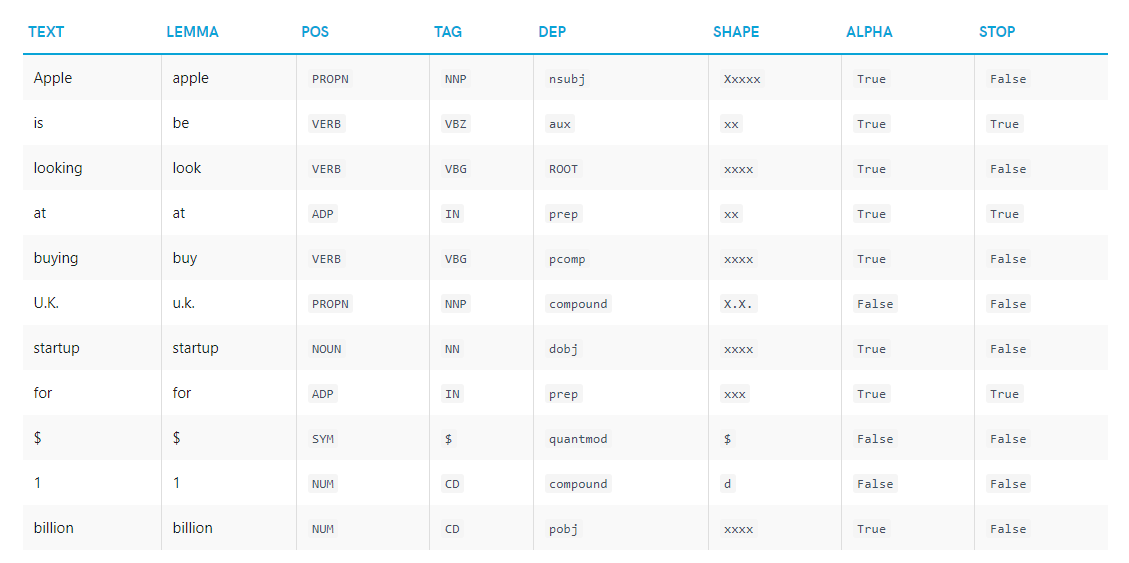

In [6]:
from IPython.display import Image
Image("005_002.png")

In [7]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)

Apple Apple PROPN NNP nsubj Xxxxx True False
is be AUX VBZ aux xx True True
looking look VERB VBG ROOT xxxx True False
at at ADP IN prep xx True True
buying buy VERB VBG pcomp xxxx True False
U.K. U.K. PROPN NNP compound X.X. False False
startup startup NOUN NN dobj xxxx True False
for for ADP IN prep xxx True True
$ $ SYM $ quantmod $ False False
1 1 NUM CD compound d False False
billion billion NUM CD pobj xxxx True False


In [3]:
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("This is a sentence.")
displacy.render(doc, style="dep")
#displacy.serve(doc, style="dep")

# 문법 완성

In [10]:
from nltk.parse import RecursiveDescentParser
import nltk

#문법(grammar) ==> 문장 생성 요소
#1. 문장 구성 요소를 생성, 계속 생성을 하고 최종 단말을 만날 때까지
#2. 어휘 구성 요소를 생성 (최종 단말 terminal string), 더 이상 생성 불가

grammar1 = nltk.CFG.fromstring("""
  S -> NP VP
  VP -> V NP | V NP PP
  PP -> P NP
  V -> "saw" | "ate" | "walked"
  NP -> "John" | "Mary" | "Bob" | Det N | Det N PP
  Det -> "a" | "an" | "the" | "my"
  N -> "man" | "dog" | "cat" | "telescope" | "park"
  P -> "in" | "on" | "by" | "with"
  """)

sent = "Mary saw Bob".split() #문장입력

#파싱 알고리즘 (cyk 알고리즘: 계단식)
rd_parser = nltk.RecursiveDescentParser(grammar1)

for tree in rd_parser.parse(sent):
    print(tree)

tree.draw()

(S (NP Mary) (VP (V saw) (NP Bob)))


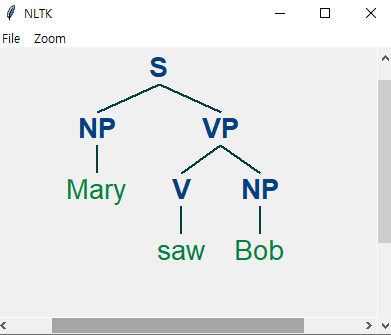

In [11]:
Image("005_003.png") #parse tree

In [ ]:
from nltk.grammar import CFG
from nltk.parse.chart import ChartParser, BU_LC_STRATEGY

grammar = CFG.fromstring("""
S -> T1 T4
T1 -> NNP VBZ
T2 -> DT NN
T3 -> IN NNP
T4 -> T3 | T2 T3
NNP -> 'Tajmahal' | 'Agra' | 'Bangalore' | 'Karnataka'
VBZ -> 'is'
IN -> 'in' | 'of'
DT -> 'the'
NN -> 'capital'
""")

cp = ChartParser(grammar, BU_LC_STRATEGY, trace=True)

sentence = "Bangalore is the capital of Karnataka"
tokens = sentence.split()
chart = cp.chart_parse(tokens)
parses = list(chart.parses(grammar.start()))
print("Total Edges :", len(chart.edges()))
for tree in parses: 
    print(tree)

tree.draw()

|.Bangal.  is  . the  .capita.  of  .Karnat.|
|[------]      .      .      .      .      .| [0:1] 'Bangalore'
|.      [------]      .      .      .      .| [1:2] 'is'
|.      .      [------]      .      .      .| [2:3] 'the'
|.      .      .      [------]      .      .| [3:4] 'capital'
|.      .      .      .      [------]      .| [4:5] 'of'
|.      .      .      .      .      [------]| [5:6] 'Karnataka'
|[------]      .      .      .      .      .| [0:1] NNP -> 'Bangalore' *
|[------>      .      .      .      .      .| [0:1] T1 -> NNP * VBZ
|.      [------]      .      .      .      .| [1:2] VBZ -> 'is' *
|[-------------]      .      .      .      .| [0:2] T1 -> NNP VBZ *
|[------------->      .      .      .      .| [0:2] S  -> T1 * T4
|.      .      [------]      .      .      .| [2:3] DT -> 'the' *
|.      .      [------>      .      .      .| [2:3] T2 -> DT * NN
|.      .      .      [------]      .      .| [3:4] NN -> 'capital' *
|.      .      [-------------]      .      .| [2:

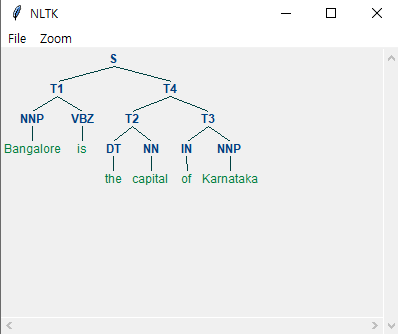

In [13]:
Image("005_005.png")

# 연습 문제
CFG (Context Free Grammar) 문법 규칙을 채워서 넣으시오

In [7]:
import nltk

grammar = nltk.grammar.DependencyGrammar.fromstring("""

'yield' -> 'savings' 'gains'
'savings' -> 'small'
'gains' -> 'large'

""")

sentence = 'small savings yield large gains'
dp = nltk.parse.ProjectiveDependencyParser(grammar)
for t in sorted(dp.parse(sentence.split())):
    print(t)

t.draw()

(yield (savings small) (gains large))


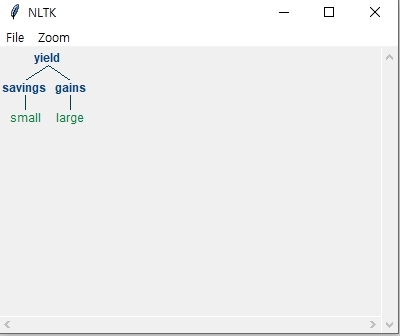

In [15]:
Image("005_006.png")

In [10]:
import nltk

def RDParserExample(grammar, textlist):
    parser = nltk.parse.RecursiveDescentParser(grammar)
    for text in textlist:
        sentence = nltk.word_tokenize(text)
        for tree in parser.parse(sentence):
            print(tree)
            tree.draw()

grammar = nltk.CFG.fromstring("""

S -> NP VP
NP -> NNP VBZ
VP -> IN NNP | DT NN IN NNP
NNP -> 'Tajmahal' | 'Agra' | 'Bangalore' | 'Karnataka'
VBZ -> 'is' 
IN -> 'in' | 'of'
DT -> 'the'
NN -> 'capital'

""")

text = ["Tajmahal is in Agra",
         "Bangalore is the capital of Karnataka"]

RDParserExample(grammar, text)

(S (NP (NNP Tajmahal) (VBZ is)) (VP (IN in) (NNP Agra)))
(S
  (NP (NNP Bangalore) (VBZ is))
  (VP (DT the) (NN capital) (IN of) (NNP Karnataka)))


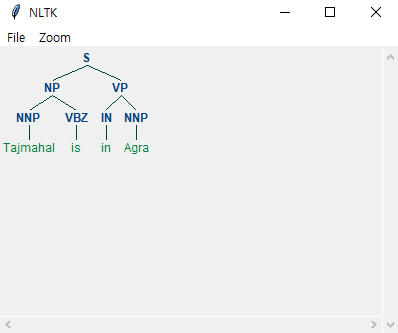

In [17]:
Image("005_007.png")

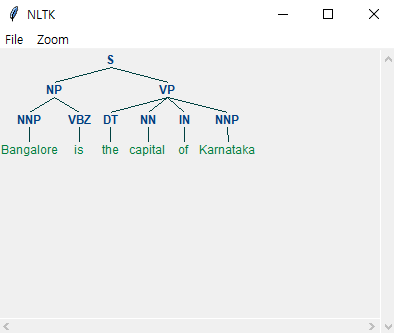

In [18]:
Image("005_008.png")